# 4 Python plotting, 2D arrays, units

## Python programming style

The [PEP 8 -- Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008) describes best practice in terms of programming style for python. 


In [1]:
#%pylab nbagg
#%pylab ipympl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Basic plotting
* workhorse: [matplotlib](http://matplotlib.org)
* [list of available markers](https://matplotlib.org/api/markers_api.html)

In [106]:
np.sqrt(1-(2*pi)**2)
2*pi

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


6.283185307179586

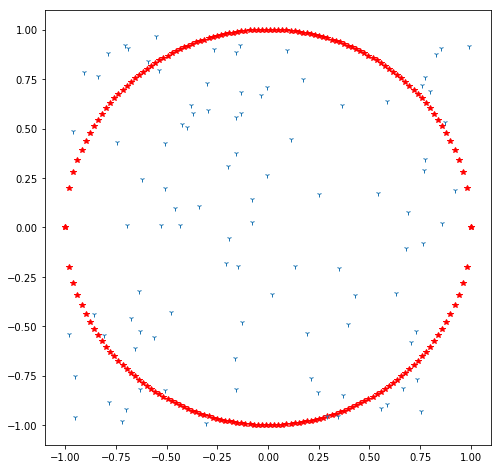

2.84


In [196]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random as r
from numpy import pi
import math as mp

n = 100
x = r.uniform(-1,1,n)
y = r.uniform(-1,1,n)
a = 1

tot1=0
for i in x**2+y**2:
    if i<=1:
        tot1+=1
        
tot2=len(x)

circ_x = np.linspace(-1,1,n)
y1  = np.sqrt( a**2 - circ_x**2 ) *  1
y2  = np.sqrt( a**2 - circ_x**2 ) * -1
plt.figure(figsize=(8,8))
plt.plot(circ_x, y1,'r*', circ_x, y2,'r*', x, y,'1')
plt.show()
print((tot1/tot2)*4)

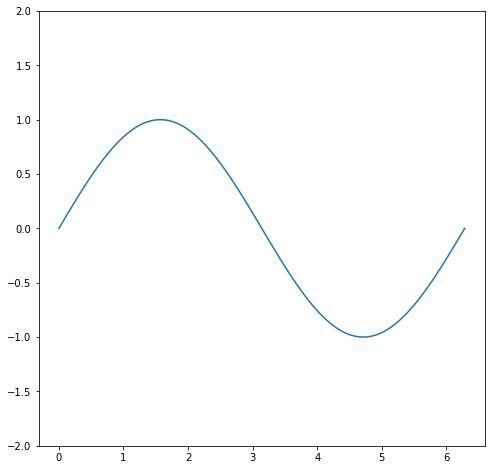

In [195]:
n=100
x = np.linspace(0,2*np.pi,n)
plt.figure(figsize=(8,8))
plt.ylim(-2,2)
plt.plot(x,np.sin(x))
plt.show()

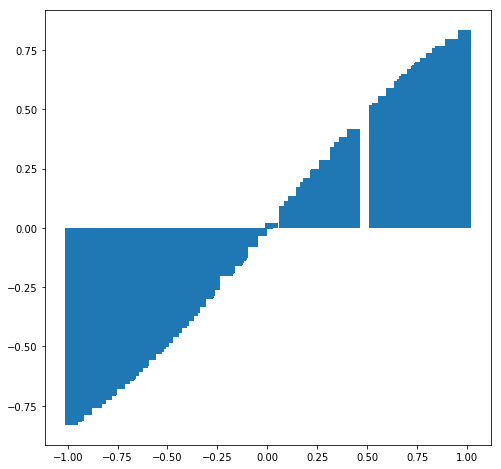

In [205]:
n=100
delta_x = 2*np.pi/(n-1)
plt.figure(figsize=(8,8))
plt.bar(x,np.sin(x),delta_x)
plt.show()

## Plotting a polynomial function and noisy data
$$
f(x) = ax^3 + bx^2 + cx + d
$$

In [206]:
a = -1.; b = 1.; c = 1.; d = 1.
f = lambda x: a*x**3 + b*x**2 + c*x + d

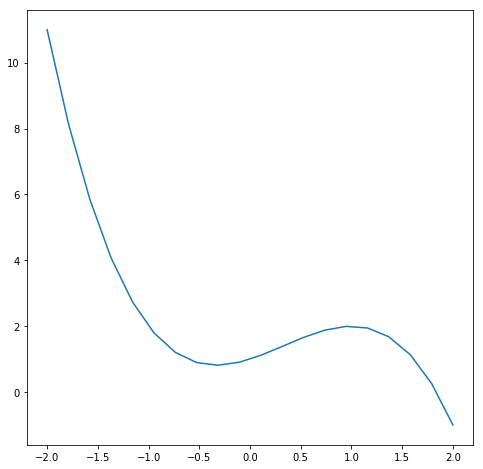

In [193]:
n = 20
x = np.linspace(-2.,2.,n)
# plot
plt.figure(figsize=(8,8))
plt.plot(x,f(x),label='polynomial')
plt.show()

In [209]:
# let's add some noise to this analytical data
y_eps=1.7; x_eps = 0. 
d_err = y_eps*(np.random.rand(len(x))-0.5)
y_noise = f(x)+d_err
x_noise = x+x_eps*d_err

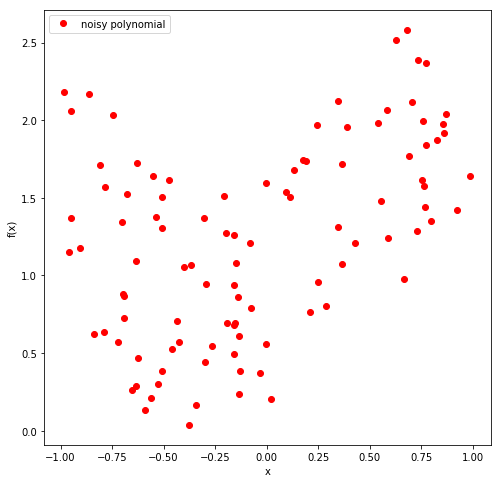

In [213]:
# plot
plt.figure(figsize=(8,8))
plt.plot(x+x_eps*d_err,f(x)+d_err,'ro',label='noisy polynomial')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

### A short foray into interpolation using scipy libraries

In [214]:
from scipy import interpolate
f_int1=interpolate.interp1d(x_noise,y_noise,kind='linear')
f_int2=interpolate.interp1d(x_noise,y_noise,kind='cubic')

In [217]:
plt.figure(4)
xgrid=np.linspace(-1.95,1.95,500)
plt.plot(xgrid,f_int1(xgrid),label='linear interpolation')
plt.plot(xgrid,f_int2(xgrid),label='cubic interpolation')
plt.legend(loc=0)

ValueError: A value in x_new is below the interpolation range.

<Figure size 432x288 with 0 Axes>

## 2D arrays

Transpose is often used in order to plot a series of pairs or triples in a 2D array.

You can also extract the columns of an array:

In [19]:
x,y,z = a.T

In [220]:
plot(x,z,'hg')

NameError: name 'plot' is not defined

You can reshape an array. These means that you change the number of rows and columns as long as the product stays the same:

In [21]:
aa=a[0:4]
aa

array([[ 0,  0,  0],
       [ 1,  1,  1],
       [ 2,  4,  8],
       [ 3,  9, 27]])

In [22]:
aa[2][0]

2

In [23]:
a[2,0]

2

In [24]:
len(aa.flatten())/2

6.0

In [25]:
b=aa.reshape((2,6))

In [26]:
b

array([[ 0,  0,  0,  1,  1,  1],
       [ 2,  4,  8,  3,  9, 27]])

In [27]:
aa[0][0],aa[0][1],aa[0][2],aa[1][0],aa[1][1],aa[1][2]

(0, 0, 0, 1, 1, 1)

In [28]:
b[1,1]

4

#### Slicing

In [29]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [30]:
#last element
x[-1]

14

In [31]:
# reverse order
x[::-1]

array([14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

In [32]:
# average
average(linspace(5,15))

9.999999999999998

In [33]:
# centered (moving) average
average(x[5-1:5+1])

4.5

## 2D plots
We want to plot
$$ z(x,y) = \sin(x)\cos(y) $$

In [34]:
# experiment with x being a vector -> sin(x) vector
n = 4
x=linspace(-4.,4.,n)
sin(x)

array([ 0.7568025, -0.9719379,  0.9719379, -0.7568025])

In [35]:
# can x be matrix?
xy=array([[1,2],[0,1]])
sin(xy)

array([[0.84147098, 0.90929743],
       [0.        , 0.84147098]])

* how to build a 2D array out of x and y vectors that represent the x and y axis? [numpy.meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html)

In [36]:
n = 20
x=linspace(-3.,5.,n)
y=linspace(-4.,4.,n)
#x

In [37]:
xv,yv = meshgrid(x,y)
#yv

In [38]:
z=sin(xv)*cos(yv)
#shape(z)
#z

### Image

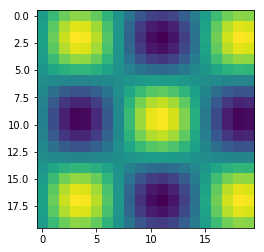

In [39]:
ifig = 2; close(ifig); figure(ifig)
imshow(z)

`imshow` allows for a variety of interpolations, see [images example](http://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html):

In [40]:
#imshow?

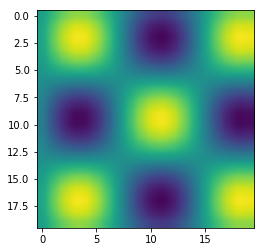

In [41]:
ifig = 3; close(ifig); figure(ifig)
imshow(z,interpolation='gaussian')

### Surface plot

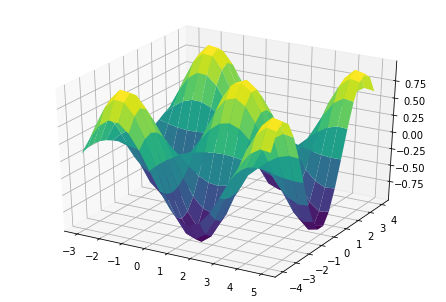

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
close(7);fig = plt.figure(7)
ax = Axes3D(fig)
ax.plot_surface(xv,yv,z, rstride=1, cstride=1, cmap=cm.viridis)
plt.show()

### Contour plot

<a list of 32 text.Text objects>

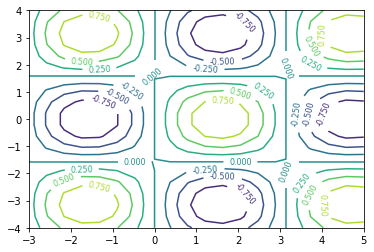

In [43]:
close(8);fig = plt.figure(8)
CS = plt.contour(xv, yv, z)
plt.clabel(CS, inline=1, fontsize=8)

## Units and constants

Physics is about numbers with units. We can draw units into our python work using - of course - appropriate packages. 
There are several packages now that provide unit support, including
* [Astropy](http://docs.astropy.org/en/v0.2.1/units/index.html), also offers [constants](http://docs.astropy.org/en/stable/constants/)
* [SymPy](http://docs.sympy.org/1.0/modules/physics/units.html)
* [Pint](https://pint.readthedocs.io/en/latest)


Here is an example:
* calculate how long a $50\mathrm{W}$ light bulb could shine with the energy that is consumed by destruction when a car going at $120\mathrm{km/h}$ hits a rigid wall.
* before solving this problem make a guess! you may be surprised

### Using astropy

In [44]:
# import astropy unitis package and define variables
import astropy.units as u
m = 1300000 * u.g
v = 120 *u.km/u.hr
E = 0.5*m*v**2
P = 50 * u.watt

In [45]:
# print energy in different units
print (E.to('erg'))
print (E)
print (E.si)
u.erg.find_equivalent_units()

7222222222222.222 erg
9360000000.0 g km2 / h2
722222.2222222222 m N


  Primary name | Unit definition        | Aliases     
[
  J            | kg m2 / s2             | Joule, joule ,
  Ry           | 2.17987e-18 kg m2 / s2 | rydberg      ,
  eV           | 1.60218e-19 kg m2 / s2 | electronvolt ,
  erg          | 1e-07 kg m2 / s2       |              ,
]

In [46]:
# calculate time
t = E / P
print (t.si)
print (t.to('hr'))

14444.444444444443 s
4.012345679012346 h


**Constants:** `astropy` also provides constants:

In [47]:
from astropy import constants as const
const.L_sun
const.G

<<class 'astropy.constants.codata2014.CODATA2014'> name='Gravitational constant' value=6.67408e-11 uncertainty=3.1e-15 unit='m3 / (kg s2)' reference='CODATA 2014'>

### Using sympy

In [48]:
# import sympy unitis package and define variables
import sympy.physics.units as u
u.find_unit('power')

['W', 'watt', 'watts', 'planck_power', 'optical_power']

In [49]:
u.find_unit(u.power)

['W', 'watt', 'watts', 'planck_power']

In [50]:
u.W

watt

In [51]:
v = 5000*u.meter/u.second

In [52]:
km=1000*u.meters/ u.kilometer

In [53]:
v/km

5*kilometer/second

In [54]:
ww = u.kilogram * u.meter**2 /u.second**3

In [55]:

m = 1300000 * u.g
v = 120 *u.km/u.hour
E = 0.5*m*v**2
P = 50 * u.watt

In [56]:
# calculate time
t = E / P
print (t*(u.watt/ww) * (1000*u.meter/u.kilometer)**2 / (1000*u.gram/u.kilogram) /(3600*u.seconds/u.hour)**3)

4.01234567901235*hour
